In [2]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
from datetime import datetime
import time,os

# 抓今天日期
today=datetime.now()
today_name=datetime.strftime(today,'%Y-%m-%d')

url='https://covid-19.nchc.org.tw/city_confirmed.php?downloadall=yes'
driver_path=Service('D:/chromedriver.exe')
driver=webdriver.Chrome(service=driver_path)
driver.get(url)

driver.find_element(By.TAG_NAME,'body').send_keys(Keys.END)
time.sleep(2)
driver.find_elements(By.CSS_SELECTOR,'#myTable02_wrapper .dt-buttons .dt-button')[2].click()
time.sleep(10)  # 等待下載及掃毒
print('下載csv完成') 

# 移動及更改檔名 若有移動檔案位置記得改new_fn
old_fn=r'C:/Users/USER/Downloads/vaccineCityLevel.csv'
new_fn=r'C:/Users/USER/git-repos/python3-junior-nogithub/Taiwan_COVID_19_Side_Project/Csvs/Taiwan_COVID_19_'+today_name+'.csv'
try:
    os.rename(old_fn,new_fn)
    print('移動更名成功')
except Exception as err:
    # 檢查檔案是否存在
    if os.path.isfile(new_fn):
        print('原檔案已存在\n下載檔未移動')
        try:
            os.remove(old_fn)
        except OSError as e:
            print('下載檔刪除失敗',e)
        else:
            print('下載檔刪除成功')
    else:
        print('檔案不存在、路徑不正確或移動更名失敗')
            
driver.close()

下載csv完成
原檔案已存在
下載檔未移動
下載檔刪除成功


In [1]:
# 直接取網頁值 不照縣市排序
import requests,bs4

url='http://www.isha.org.tw/tools/2012web_s_tools_02a_01%E7%B8%A3%E5%B8%82%E5%88%A5%E4%BB%A3%E7%A2%BC%E8%A1%A8.asp'
html=requests.get(url)
html.encoding='utf-8'
obj_soup=bs4.BeautifulSoup(html.text,'lxml')
#print(obj_soup)
taiwan_county_list=[]
obj_td=obj_soup.find_all('td')
# 因為印出是數字與縣市交替 只選擇縣市 不選擇數字 所以從1開始
for td in obj_td[1::2]:
    txts=td.text
    if txts=='桃園縣':
        txts='桃園市'
    taiwan_county_list.append(txts.strip())
print(taiwan_county_list)


['基隆市', '嘉義市', '台北市', '嘉義縣', '新北市', '台南市', '桃園市', '高雄市', '新竹市', '屏東縣', '新竹縣', '台東縣', '苗栗縣', '花蓮縣', '台中市', '宜蘭縣', '彰化縣', '澎湖縣', '南投縣', '金門縣', '雲林縣', '連江縣']


In [2]:
# 字典方式排列縣市順序

import requests,bs4

url='http://www.isha.org.tw/tools/2012web_s_tools_02a_01%E7%B8%A3%E5%B8%82%E5%88%A5%E4%BB%A3%E7%A2%BC%E8%A1%A8.asp'
html=requests.get(url)
html.encoding='utf-8'
obj_soup=bs4.BeautifulSoup(html.text,'lxml')

obj_td2=obj_soup.find_all('td')
#print(obj_td2)

td2_list=[]
for td2 in obj_td2:
    txts=td2.text
    if txts=='桃園縣':
        txts='桃園市'
    td2_list.append(txts.strip())
    
# list可以透過slice轉成dict
taiwan_county_dict=dict(zip(td2_list[0::2],td2_list[1::2]))  
print(taiwan_county_dict,'\n')

# sorted排序後會轉list 所以需再轉dict
taiwan_county_dict=dict(sorted(taiwan_county_dict.items()))  # sorted排序後會轉list 所以需再轉dict
print(taiwan_county_dict,'\n')


taiwan_county_list=list(taiwan_county_dict.values())
print(taiwan_county_list)

{'01': '基隆市', '12': '嘉義市', '02': '台北市', '13': '嘉義縣', '03': '新北市', '14': '台南市', '04': '桃園市', '15': '高雄市', '05': '新竹市', '16': '屏東縣', '06': '新竹縣', '17': '台東縣', '07': '苗栗縣', '18': '花蓮縣', '08': '台中市', '19': '宜蘭縣', '09': '彰化縣', '20': '澎湖縣', '10': '南投縣', '21': '金門縣', '11': '雲林縣', '22': '連江縣'} 

{'01': '基隆市', '02': '台北市', '03': '新北市', '04': '桃園市', '05': '新竹市', '06': '新竹縣', '07': '苗栗縣', '08': '台中市', '09': '彰化縣', '10': '南投縣', '11': '雲林縣', '12': '嘉義市', '13': '嘉義縣', '14': '台南市', '15': '高雄市', '16': '屏東縣', '17': '台東縣', '18': '花蓮縣', '19': '宜蘭縣', '20': '澎湖縣', '21': '金門縣', '22': '連江縣'} 

['基隆市', '台北市', '新北市', '桃園市', '新竹市', '新竹縣', '苗栗縣', '台中市', '彰化縣', '南投縣', '雲林縣', '嘉義市', '嘉義縣', '台南市', '高雄市', '屏東縣', '台東縣', '花蓮縣', '宜蘭縣', '澎湖縣', '金門縣', '連江縣']


In [3]:
import numpy as np
import pandas as pd

fn='Csvs/Taiwan_COVID_19_2022-04-25.csv'
df=pd.read_csv(fn)

# 找出每行的列是否有空值
print(pd.isnull(df).sum(axis=1))  # 按行方向印出內容是否空值 因此axis=1
df.dropna(axis=0,how='any')     # 刪除列 因此axis=0

df

0        0
1        0
2        0
3        0
4        0
        ..
55685    0
55686    0
55687    0
55688    0
55689    0
Length: 55690, dtype: int64


,id,個案研判日,個案公佈日,縣市,鄉鎮,性別,是否為境外移入,年齡層
0,21,2022-04-24,2022-04-24,彰化縣,溪湖鎮,男,否,5-9
1,20,2022-04-24,2022-04-24,彰化縣,大村鄉,女,否,20-24
2,19,2022-04-24,2022-04-24,彰化縣,埤頭鄉,男,否,30-34
3,17,2022-04-24,2022-04-24,彰化縣,員林市,男,否,30-34
4,18,2022-04-24,2022-04-24,彰化縣,員林市,男,否,35-39
...,...,...,...,...,...,...,...,...
55685,"55,686",2020-01-27,2020-01-27,境外移入,空值,女,是,50-54
55686,"55,687",2020-01-26,2020-01-26,境外移入,空值,女,是,55-59
55687,"55,688",2020-01-24,2020-01-24,境外移入,空值,女,是,50-54
55688,"55,689",2020-01-24,2020-01-24,境外移入,空值,男,是,55-59


In [8]:
df_year=list(df['年齡層'])
df_year

['5-9',
 '20-24',
 '30-34',
 '30-34',
 '35-39',
 '5-9',
 '35-39',
 '15-19',
 '35-39',
 '35-39',
 '70+',
 '20-24',
 '15-19',
 '20-24',
 '70+',
 '55-59',
 '30-34',
 '30-34',
 '70+',
 '35-39',
 '35-39',
 '20-24',
 '20-24',
 '20-24',
 '30-34',
 '40-44',
 '55-59',
 '60-64',
 '65-69',
 '15-19',
 '20-24',
 '40-44',
 '60-64',
 '30-34',
 '10-14',
 '2',
 '25-29',
 '3',
 '30-34',
 '30-34',
 '40-44',
 '5-9',
 '60-64',
 '70+',
 '0',
 '25-29',
 '25-29',
 '35-39',
 '40-44',
 '45-49',
 '50-54',
 '60-64',
 '65-69',
 '65-69',
 '45-49',
 '5-9',
 '10-14',
 '60-64',
 '70+',
 '30-34',
 '40-44',
 '50-54',
 '25-29',
 '70+',
 '4',
 '20-24',
 '45-49',
 '55-59',
 '65-69',
 '55-59',
 '20-24',
 '50-54',
 '20-24',
 '40-44',
 '20-24',
 '20-24',
 '40-44',
 '25-29',
 '1',
 '20-24',
 '25-29',
 '35-39',
 '40-44',
 '55-59',
 '70+',
 '1',
 '25-29',
 '25-29',
 '45-49',
 '55-59',
 '70+',
 '70+',
 '70+',
 '35-39',
 '10-14',
 '20-24',
 '25-29',
 '35-39',
 '35-39',
 '45-49',
 '5-9',
 '50-54',
 '55-59',
 '65-69',
 '20-24',
 '55

In [9]:
# 找出每行的列是否有空值
pd.isnull(df).sum(axis=0)

id         0
個案研判日      0
個案公佈日      0
縣市         0
鄉鎮         0
性別         0
是否為境外移入    0
年齡層        0
dtype: int64

In [4]:
# 找到某標題行包含特定字串的列
df_2204=df.loc[df['個案公佈日'].str.contains("2022-04")]
df_2203=df.loc[df['個案公佈日'].str.contains("2022-03")]
df_2202=df.loc[df['個案公佈日'].str.contains("2022-02")]
df_2201=df.loc[df['個案公佈日'].str.contains("2022-01")]
print(df_2204)
print(df_2203)
print(df_2202)
print(df_2201)

           id       個案研判日       個案公佈日   縣市   鄉鎮 性別 是否為境外移入    年齡層
0          21  2022-04-24  2022-04-24  彰化縣  溪湖鎮  男       否    5-9
1          20  2022-04-24  2022-04-24  彰化縣  大村鄉  女       否  20-24
2          19  2022-04-24  2022-04-24  彰化縣  埤頭鄉  男       否  30-34
3          17  2022-04-24  2022-04-24  彰化縣  員林市  男       否  30-34
4          18  2022-04-24  2022-04-24  彰化縣  員林市  男       否  35-39
...       ...         ...         ...  ...  ... ..     ...    ...
32141  31,853  2022-04-01  2022-04-01  台北市  內湖區  女       否  20-24
32142  31,854  2022-04-01  2022-04-01  台北市  內湖區  女       否  30-34
32143  31,855  2022-04-01  2022-04-01  台北市  內湖區  女       否  60-64
32144  31,852  2022-04-01  2022-04-01  台中市   西區  男       否  40-44
32145  31,851  2022-04-01  2022-04-01  台中市  梧棲區  女       否  35-39

[32146 rows x 8 columns]
           id       個案研判日       個案公佈日    縣市   鄉鎮 性別 是否為境外移入    年齡層
32146  32,369  2022-03-31  2022-03-31   高雄市  鳳山區  女       否  40-44
32147  32,370  2022-03-31  2022-03-31   高雄市  鳳山區

[['基隆市', 1879, 101, 0, 2], ['台北市', 4620, 35, 26, 24], ['新北市', 8648, 114, 87, 19], ['桃園市', 3319, 64, 127, 304], ['新竹市', 258, 5, 0, 6], ['新竹縣', 396, 61, 4, 5], ['苗栗縣', 147, 0, 14, 0], ['台中市', 876, 2, 1, 2], ['彰化縣', 207, 8, 1, 0], ['南投縣', 86, 0, 0, 0], ['雲林縣', 199, 6, 0, 0], ['嘉義市', 40, 4, 0, 0], ['嘉義縣', 69, 6, 0, 0], ['台南市', 377, 23, 8, 4], ['高雄市', 996, 39, 87, 105], ['屏東縣', 290, 0, 3, 1], ['台東縣', 174, 17, 0, 0], ['花蓮縣', 1113, 4, 0, 0], ['宜蘭縣', 688, 5, 3, 6], ['澎湖縣', 6, 0, 0, 0], ['金門縣', 11, 1, 0, 0], ['連江縣', 10, 0, 0, 0]]
   County  2022/04  2022/03  2022/02  2022/01
0     基隆市     1879      101        0        2
1     台北市     4620       35       26       24
2     新北市     8648      114       87       19
3     桃園市     3319       64      127      304
4     新竹市      258        5        0        6
5     新竹縣      396       61        4        5
6     苗栗縣      147        0       14        0
7     台中市      876        2        1        2
8     彰化縣      207        8        1        0
9     南投縣    

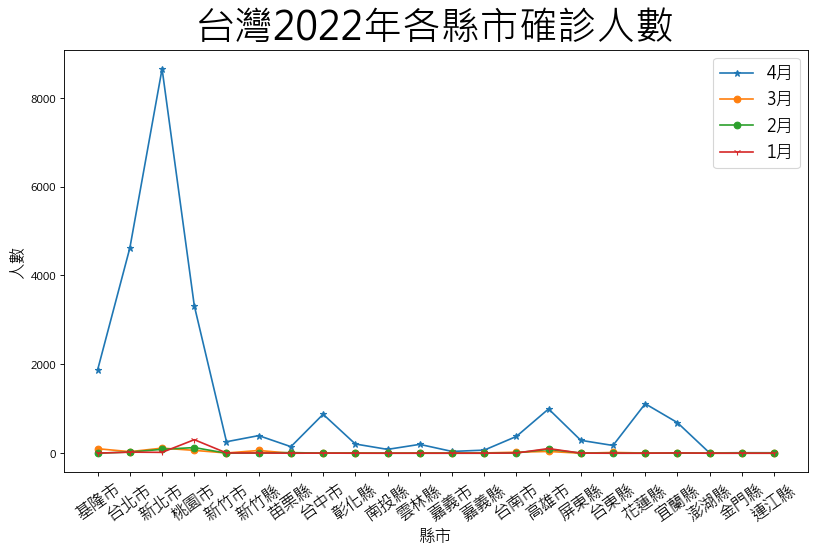

In [10]:
# 畫出2022各縣市各月份確診人數線性圖 因為數字差距不大 很清楚
import matplotlib.pyplot as plt
county_num_list=[]

def Taiwan_County_Fn(df_):
    df_new=df_.loc[df_['縣市']==t_obj]
    len_=len(df_new)
    return len_

for t_i,t_obj in enumerate(taiwan_county_list):
    # 沒def的話就要一個一個這樣寫
    # df_3=df_2203.loc[df_2203['縣市']==t_obj]
    # print(t_obj,'_',len(df_3))
    nums_2204=Taiwan_County_Fn(df_2204)
    nums_2203=Taiwan_County_Fn(df_2203)
    nums_2202=Taiwan_County_Fn(df_2202)
    nums_2201=Taiwan_County_Fn(df_2201)
    county_num_list.append([t_obj,nums_2204,nums_2203,nums_2202,nums_2201])
print(county_num_list)

df_county_num=pd.DataFrame(county_num_list,columns=['County','2022/04','2022/03','2022/02','2022/01'])
print(df_county_num)

# 顯示中文
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

plt.figure(dpi=80,figsize=(12,7))
plt.plot(df_county_num['County'],df_county_num['2022/04'],'-*',label='4月')
plt.plot(df_county_num['County'],df_county_num['2022/03'],'-o',label='3月')
plt.plot(df_county_num['County'],df_county_num['2022/02'],'-o',label='2月')
plt.plot(df_county_num['County'],df_county_num['2022/01'],'-1',label='1月')
plt.legend(fontsize=15,loc='best')
plt.xticks(fontsize=15,rotation=35)

plt.title('台灣2022年各縣市確診人數',fontsize=35)
plt.xlabel('縣市',fontsize=15)
plt.ylabel('人數',fontsize=15)
plt.show()

[['基隆市', 2169, 101, 0, 2], ['台北市', 5615, 35, 26, 24], ['新北市', 10375, 114, 87, 19], ['桃園市', 4312, 64, 127, 304], ['新竹市', 296, 5, 0, 6], ['新竹縣', 451, 61, 4, 5], ['苗栗縣', 171, 0, 14, 0], ['台中市', 1030, 2, 1, 2], ['彰化縣', 261, 8, 1, 0], ['南投縣', 93, 0, 0, 0], ['雲林縣', 225, 6, 0, 0], ['嘉義市', 58, 4, 0, 0], ['嘉義縣', 81, 6, 0, 0], ['台南市', 419, 23, 8, 4], ['高雄市', 1129, 39, 87, 105], ['屏東縣', 325, 0, 3, 1], ['台東縣', 208, 17, 0, 0], ['花蓮縣', 1283, 4, 0, 0], ['宜蘭縣', 807, 5, 3, 6], ['澎湖縣', 7, 0, 0, 0], ['金門縣', 15, 1, 0, 0], ['連江縣', 12, 0, 0, 0]]
   County  2022/04  2022/03  2022/02  2022/01
0     基隆市     2169      101        0        2
1     台北市     5615       35       26       24
2     新北市    10375      114       87       19
3     桃園市     4312       64      127      304
4     新竹市      296        5        0        6
5     新竹縣      451       61        4        5
6     苗栗縣      171        0       14        0
7     台中市     1030        2        1        2
8     彰化縣      261        8        1        0
9     南投縣 

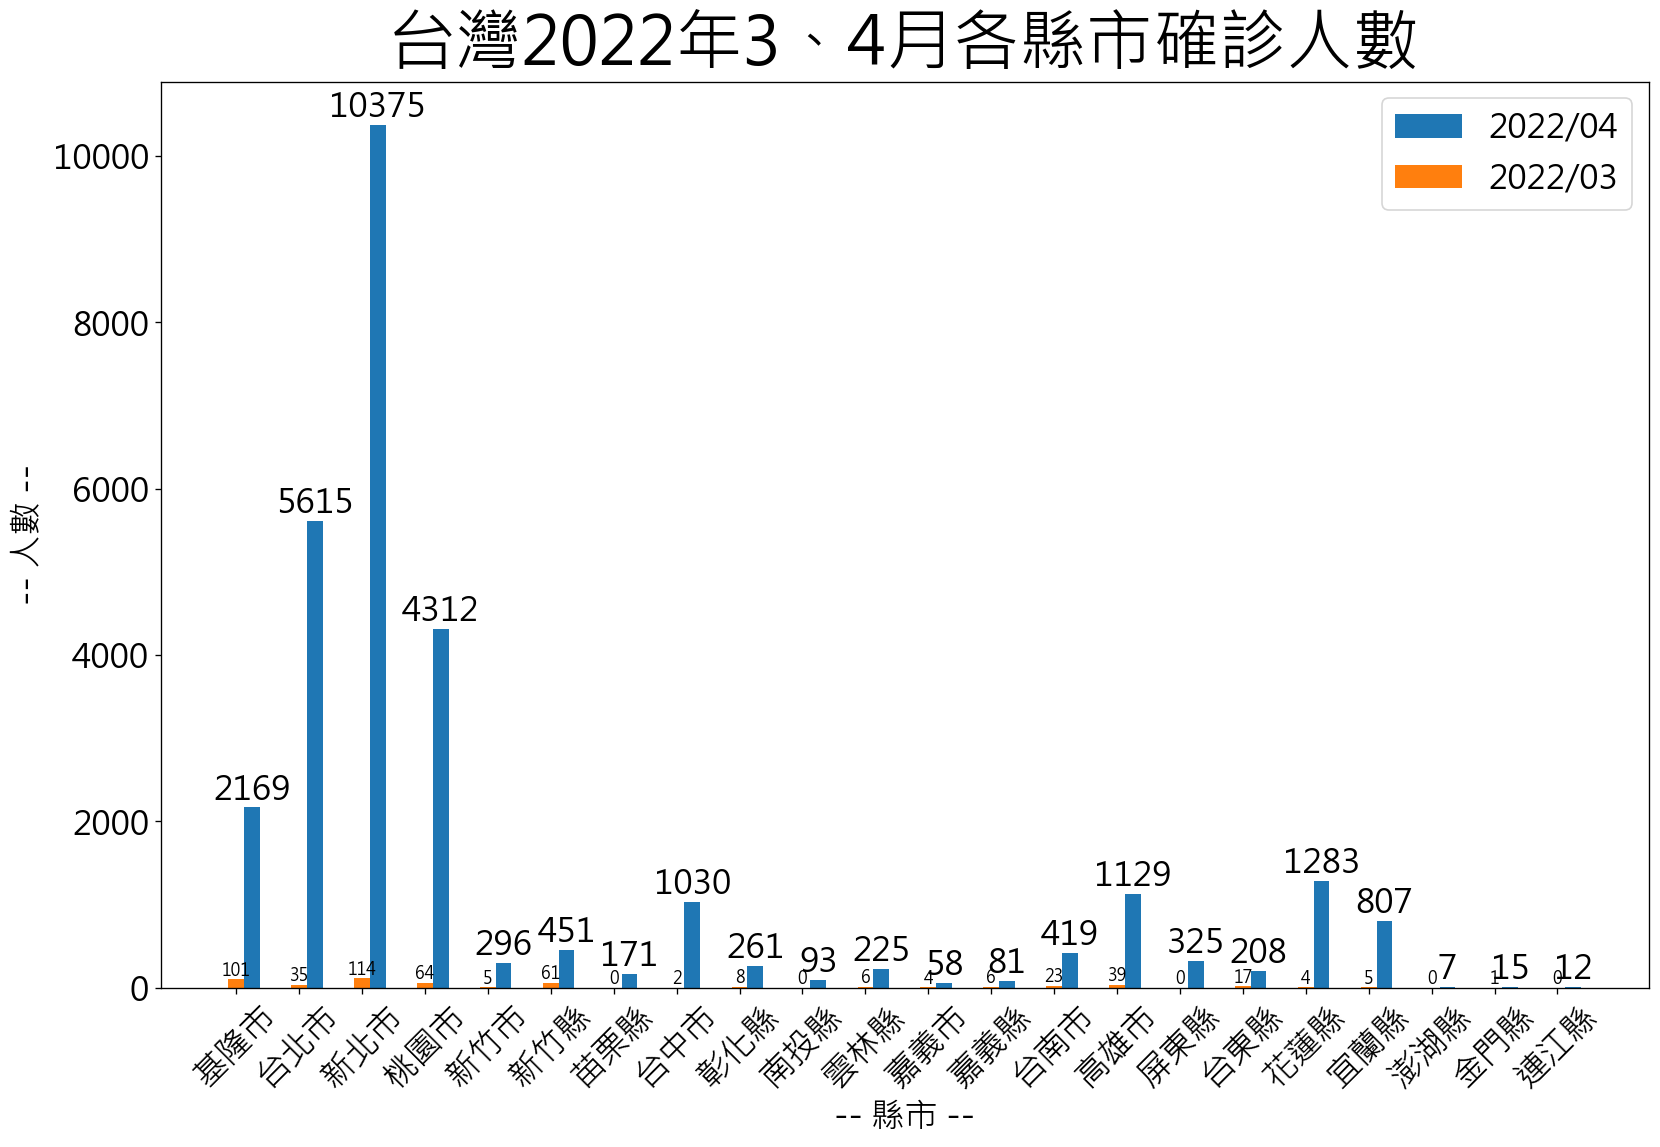

In [5]:
# 畫出2022各縣市各月份確診人數柱狀圖 因為數字差距不大 很清楚
import matplotlib.pyplot as plt
county_num_list=[]

def Taiwan_County_Fn(df_):
    df_new=df_.loc[df_['縣市']==t_obj]
    len_=len(df_new)
    return len_

for t_i,t_obj in enumerate(taiwan_county_list):
    # 沒def的話就要一個一個這樣寫
    # df_3=df_2203.loc[df_2203['縣市']==t_obj]
    # print(t_obj,'_',len(df_3))
    nums_2204=Taiwan_County_Fn(df_2204)
    nums_2203=Taiwan_County_Fn(df_2203)
    nums_2202=Taiwan_County_Fn(df_2202)
    nums_2201=Taiwan_County_Fn(df_2201)
    county_num_list.append([t_obj,nums_2204,nums_2203,nums_2202,nums_2201])
print(county_num_list)

df_county_num=pd.DataFrame(county_num_list,columns=['County','2022/04','2022/03','2022/02','2022/01'])
print(df_county_num)

# 顯示中文
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

# 設定圖片大小
plt.figure(dpi=120,figsize=(16,10))

# 設定x軸柱狀位置
x_position=np.arange(len(df_county_num['County']))
x_width=0.25  # 柱狀間格寬度

# 開始畫柱狀圖
plt.bar(x_position+x_width,df_county_num['2022/04'],label='2022/04', width=0.25)
plt.bar(x_position,df_county_num['2022/03'],label='2022/03', width=0.25)
# plt.bar(x_position-x_width,df_county_num['2022/02'],label='2022/02', width=0.25)
plt.xticks(x_position, df_county_num['County'],rotation=45,fontsize=20)  # 設定關於x軸的物件
plt.yticks(fontsize=20)
plt.legend(loc='best',fontsize=20)  # 設定圖例位置

# 柱狀圖頂端顯示數值
for a,b in zip(x_position+x_width,df_county_num['2022/04']):
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=20)
for a,b in zip(x_position,df_county_num['2022/03']):
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=10)
# for a,b in zip(x_position-x_width,df_county_num['2022/02']):
#     plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=10)

plt.title('台灣2022年3、4月各縣市確診人數',fontsize=40)
plt.xlabel('-- 縣市 --',fontsize=20)
plt.ylabel('-- 人數 --',fontsize=20)
plt.show()

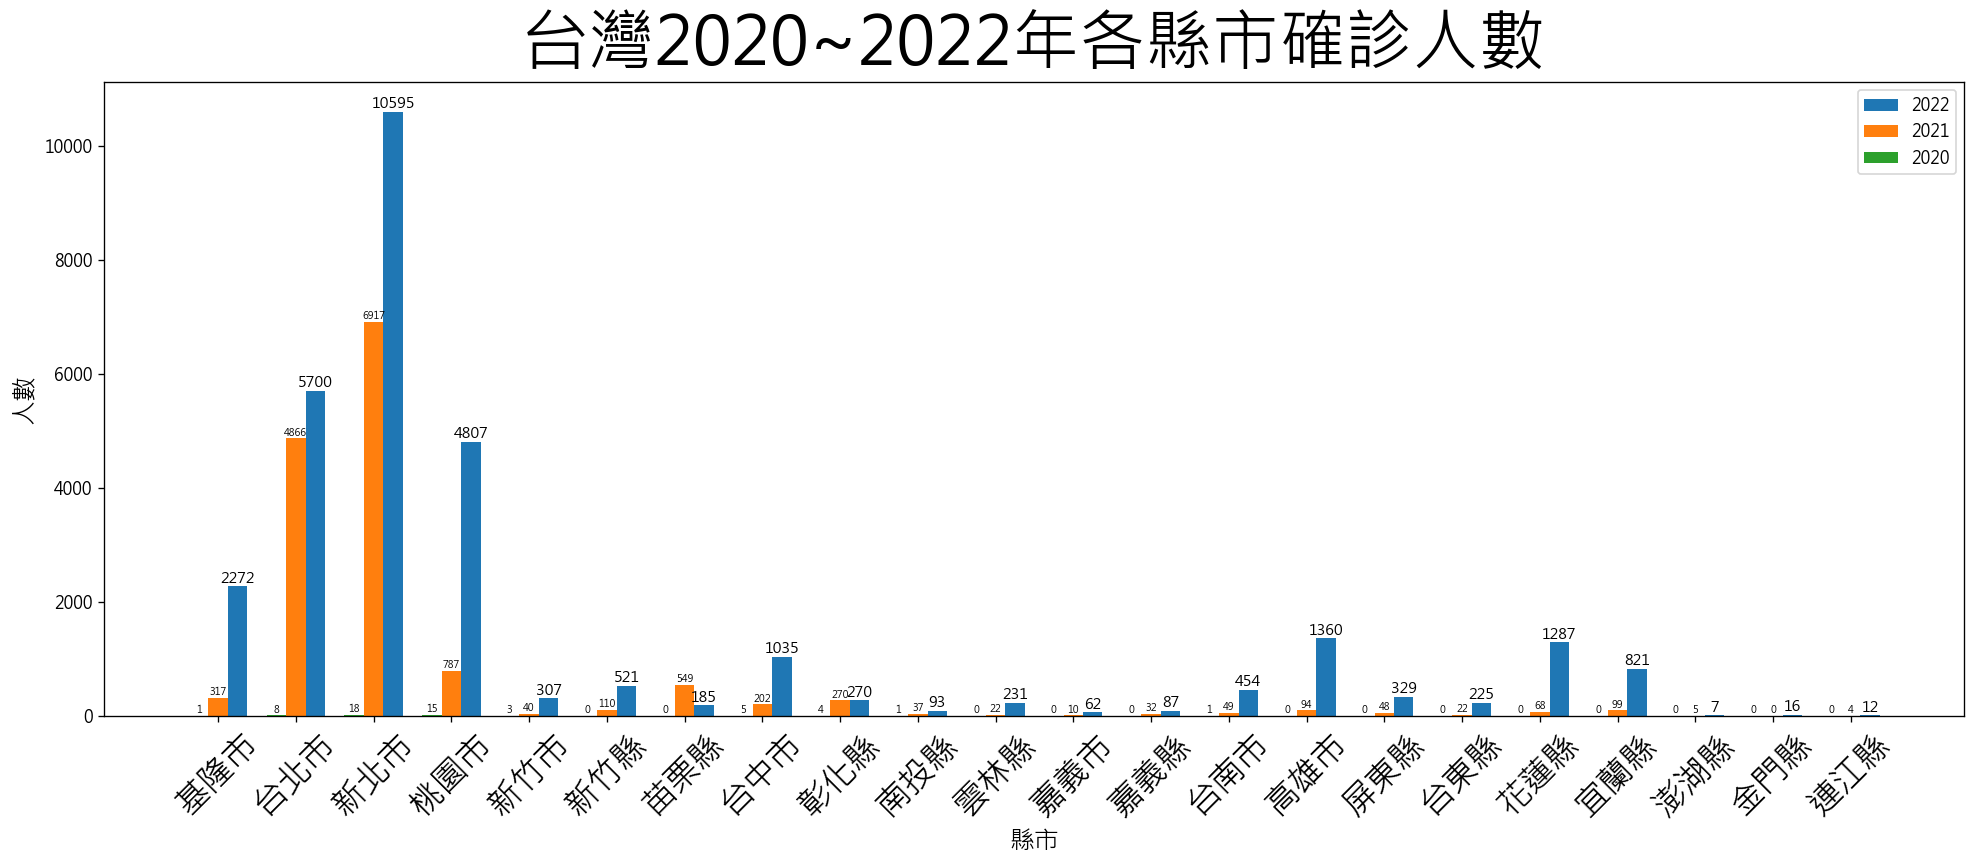

In [6]:
# 畫出2021各縣市各月份確診人數 用線條圖沒意義因為看不清楚 所以改用柱狀常條圖
import matplotlib.pyplot as plt
import numpy as np

# 找到某標題行包含特定字串的列
df_2022=df.loc[df['個案公佈日'].str.contains("2022")]
df_2021=df.loc[df['個案公佈日'].str.contains("2021")]
df_2020=df.loc[df['個案公佈日'].str.contains("2020")]

# print(df_2021)

county_year_num_list=[]

def Taiwan_County_Fn(df_):
    df_new=df_.loc[df_['縣市']==t_obj]
    len_=len(df_new)
    return len_

for t_i,t_obj in enumerate(taiwan_county_list):
    nums_2022=Taiwan_County_Fn(df_2022)
    nums_2021=Taiwan_County_Fn(df_2021)
    nums_2020=Taiwan_County_Fn(df_2020)
    county_year_num_list.append([t_obj,nums_2022,nums_2021,nums_2020])
#print(county_year_num_list)

df_county_num=pd.DataFrame(county_year_num_list,columns=['County','2022','2021','2020'])
#print(df_county_num)

# 顯示中文
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

# 設定圖片大小
plt.figure(dpi=120,figsize=(20,7))

# 設定x軸柱狀位置
x_position=np.arange(len(df_county_num['County']))
x_width=0.25  # 柱狀寬度

# 開始畫柱狀圖
plt.bar(x_position+x_width,df_county_num['2022'],label='2022', width=0.25)
plt.bar(x_position,df_county_num['2021'],label='2021', width=0.25)
plt.bar(x_position-x_width,df_county_num['2020'],label='2020', width=0.25)
plt.xticks(x_position, df_county_num['County'],rotation=45)  # 設定關於x軸的物件
plt.legend(loc='best')  # 設定圖例位置

# 柱狀圖頂端顯示數值
for a,b in zip(x_position+x_width,df_county_num['2022']):
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=9)
for a,b in zip(x_position,df_county_num['2021']):
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=6)
for a,b in zip(x_position-x_width,df_county_num['2020']):
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=6)
plt.xticks(fontsize=20)
plt.title('台灣2020~2022年各縣市確診人數',fontsize=40)
plt.xlabel('縣市',fontsize=15)
plt.ylabel('人數',fontsize=15)
plt.show()

   County  2022/04  2022/03  2022/02  2022/01
0     基隆市     2169      101        0        2
1     台北市     5615       35       26       24
2     新北市    10375      114       87       19
3     桃園市     4312       64      127      304
4     新竹市      296        5        0        6
5     新竹縣      451       61        4        5
6     苗栗縣      171        0       14        0
7     台中市     1030        2        1        2
8     彰化縣      261        8        1        0
9     南投縣       93        0        0        0
10    雲林縣      225        6        0        0
11    嘉義市       58        4        0        0
12    嘉義縣       81        6        0        0
13    台南市      419       23        8        4
14    高雄市     1129       39       87      105
15    屏東縣      325        0        3        1
16    台東縣      208       17        0        0
17    花蓮縣     1283        4        0        0
18    宜蘭縣      807        5        3        6
19    澎湖縣        7        0        0        0
20    金門縣       15        1       

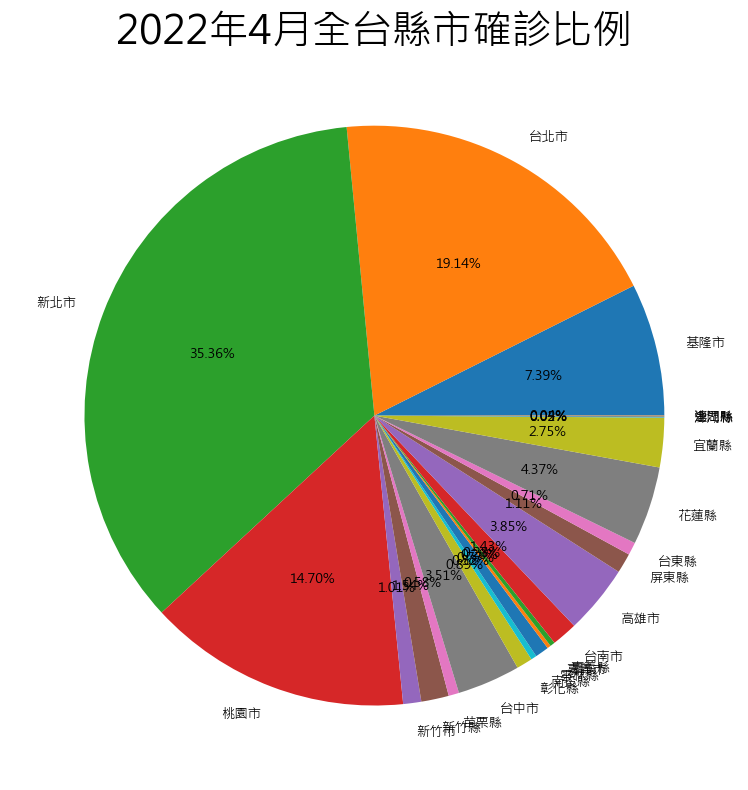

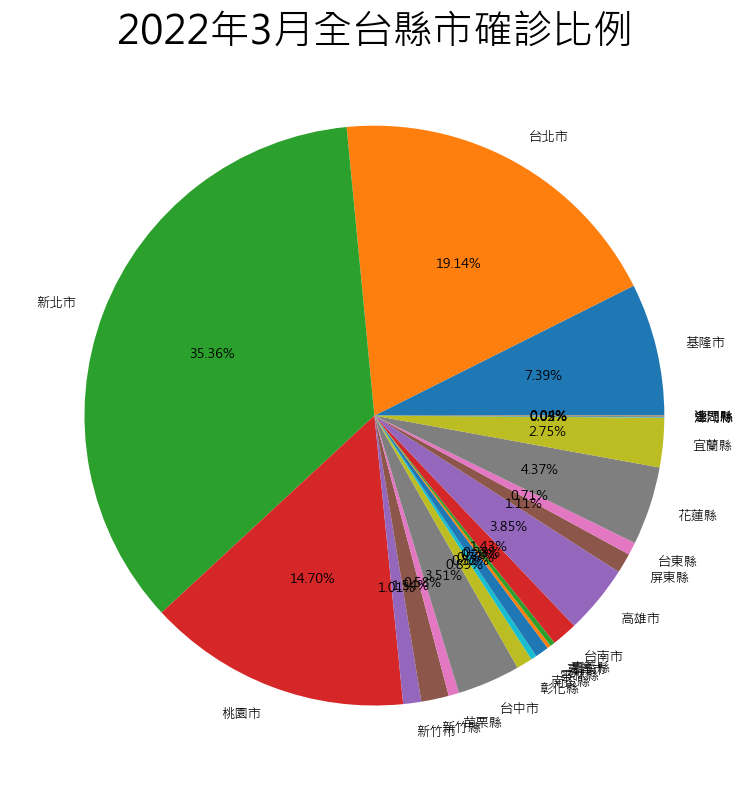

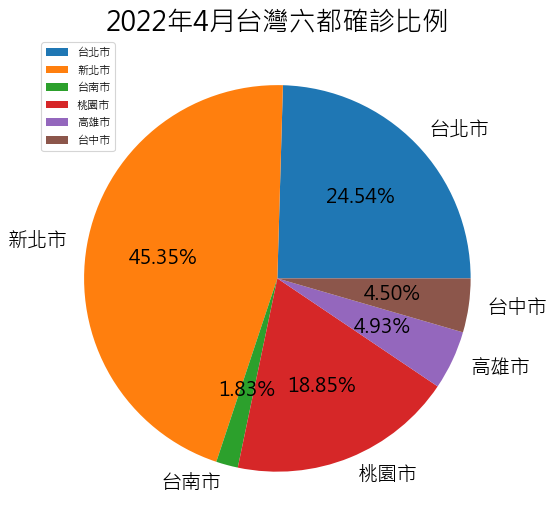

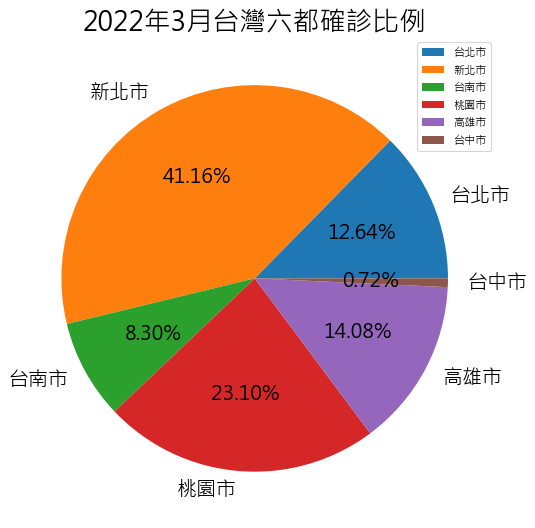

In [7]:
# 2022年1~3月台灣六都確診數  使用動態plotly

taiwan_capitals_list=['台北市','新北市','台南市','桃園市','高雄市','台中市']
capitals_num_list=[]

def Taiwan_Capitals_Fn(df_):
    df_new=df_.loc[df_['縣市']==t_obj]
    len_=len(df_new)
    return len_

df_county_num=pd.DataFrame(county_num_list,columns=['County','2022/04','2022/03','2022/02','2022/01'])
print(df_county_num)

# 六都
for t_i,t_obj in enumerate(taiwan_capitals_list):
    nums_2204=Taiwan_Capitals_Fn(df_2204)
    nums_2203=Taiwan_Capitals_Fn(df_2203)
    nums_2202=Taiwan_Capitals_Fn(df_2202)
    nums_2201=Taiwan_Capitals_Fn(df_2201)
    capitals_num_list.append([t_obj,nums_2204,nums_2203,nums_2202,nums_2201])
print(capitals_num_list)

df_capitals_num=pd.DataFrame(capitals_num_list,columns=['Capitals','2022/04','2022/03','2022/02','2022/01'])
print(df_capitals_num)

plt.figure(dpi=120,figsize=(8,8))
plt.pie(df_county_num['2022/04'], labels=df_county_num['County'], autopct='%1.2f%%',textprops = {"fontsize" : 8})
plt.title('2022年4月全台縣市確診比例',fontsize=24)
plt.show()

plt.figure(dpi=120,figsize=(8,8))
plt.pie(df_county_num['2022/04'], labels=df_county_num['County'], autopct='%1.2f%%',textprops = {"fontsize" : 8})
plt.title('2022年3月全台縣市確診比例',fontsize=24)
plt.show()

plt.figure(dpi=80,figsize=(8,8))
plt.pie(df_capitals_num['2022/04'], labels=df_capitals_num['Capitals'], autopct='%1.2f%%',textprops = {"fontsize" : 18})
plt.title('2022年4月台灣六都確診比例',fontsize=24)
plt.legend(loc='upper left')
plt.show()

plt.figure(dpi=80,figsize=(8,8))
plt.pie(df_capitals_num['2022/03'], labels=df_capitals_num['Capitals'], autopct='%1.2f%%',textprops = {"fontsize" : 18})
plt.title('2022年3月台灣六都確診比例',fontsize=24)
plt.legend()
plt.show()

In [ ]:
df

In [3]:
# 台灣行政區域爬蟲 縣市與鄉鎮結合
import pandas as pd
import requests,bs4,re

url='https://c2e.ezbox.idv.tw/zipcode.php'
html=requests.get(url)
obj_soup=bs4.BeautifulSoup(html.text,'lxml')
obj_soup.encoding='utf-8'


city_list,area_list,area_list_2,county_list=[],[],[],[]
count=0

tag_1=obj_soup.find_all('div','pure-g')[1].find_all('div','pure-u-1')
print(tag_1)
# 刪除空字串
def remove_len_0(lists):
    for l in lists:
        if len(l)==0:
            lists.remove(l)  
        #print(l)
        
#print(tag_1)
for t_1 in tag_1:
    citys=t_1.find('div','city')
    areas=t_1.find('div','area')
    
    count+=1  # 給編號確認這網頁亂78遭的結構    
    citys_txt=citys.text.strip()
    citys_txt=citys_txt.replace('臺','台')
    areas_txt=areas.text.strip()
    areas_txt=re.sub(r'[0-9]+', '', areas_txt)  # 用正規表達式消除數字
    areas_txt=areas_txt.replace('\n\n\n\n','')
    areas_txt=areas_txt.replace('\n\n\n','')
    areas_txt=areas_txt.replace('\n\n','') 
    areas_txt=areas_txt.replace('\u3000','')

#     print(count,':',citys_txt)
#     print(count,':',areas_txt)
#     print()
    # 依照縣市的數量 讓鄉鎮按照順序加入陣列 兩個list數量才會一樣方便操作
    city_list.append(citys_txt)
    area_list.append(areas_txt)
        
    remove_len_0(city_list)
    remove_len_0(area_list)
    
#print('縣市:',city_list)

#print('縣市:',len(city_list))
#print('鄉鎮:',area_list)
#print('鄉鎮:',len(area_list))

for index,obj in enumerate(area_list):
    #print(obj)
    area_=obj.split('\n')
    
    for a in area_:
        # 找出各縣市連在一起的兩個鄉鎮錯誤名稱
        if len(a)==6:
            print(index,a)
            f3=a[0:3]
            b3=a[3:6]
            
            # 將分開後的鄉鎮依序加到該縣市list
            area_.append(f3)    
            area_.append(b3)
            # 移除錯誤項目
            area_.remove(a)
    #print(area_)
    
    area_list_2.append(area_)
    # 單list當鍵 雙list當值 轉list不要給索引值啦 直接變dict就好
    area_dict=dict(zip(city_list,area_list_2))
print(area_dict)

[<div class="pure-u-1 pure-u-sm-1-2 pure-u-md-1-4 div-table">
<div class="city center"><a href="/address/%E8%87%BA%E5%8C%97%E5%B8%82" name="zone1">臺北市</a></div>
<div class="area center">
<ul>
<li><a href="/address/臺北市/中正區">中正區</a>100</li>
<li><a href="/address/臺北市/大同區">大同區</a>103</li>
<li><a href="/address/臺北市/中山區">中山區</a>104</li>
<li><a href="/address/臺北市/松山區">松山區</a>105</li>
<li><a href="/address/臺北市/大安區">大安區</a>106</li>
<li><a href="/address/臺北市/萬華區">萬華區</a>108</li>
<li><a href="/address/臺北市/信義區">信義區</a>110</li>
<li><a href="/address/臺北市/士林區">士林區</a>111</li>
<li><a href="/address/臺北市/北投區">北投區</a>112</li>
<li><a href="/address/臺北市/內湖區">內湖區</a>114</li>
<li><a href="/address/臺北市/南港區">南港區</a>115</li>
<li><a href="/address/臺北市/文山區">文山區</a>116</li>
</ul>
</div>
</div>, <div class="pure-u-1 pure-u-sm-1-2 pure-u-md-1-4 div-table fill-table"><div class="city"> </div><div class="area"></div></div>, <div class="pure-u-1 pure-u-sm-1-2 pure-u-md-1-4 div-table">
<div class="city center"><a href="

[[], []]
台北市
台北市 : ['中正區', '大同區', '中山區', '松山區', '大安區', '萬華區', '信義區', '士林區', '北投區', '內湖區', '南港區', '文山區']
89
119
335
130
212
169
164
154
187
195
88
145
--------------------------------------------------
    行政區   4月  3月
0   中正區   89   3
1   大同區  119   0
2   中山區  335   5
3   松山區  130   4
4   大安區  212   1
5   萬華區  169   9
6   信義區  164   1
7   士林區  154   3
8   北投區  187   1
9   內湖區  195   6
10  南港區   88   0
11  文山區  145   2


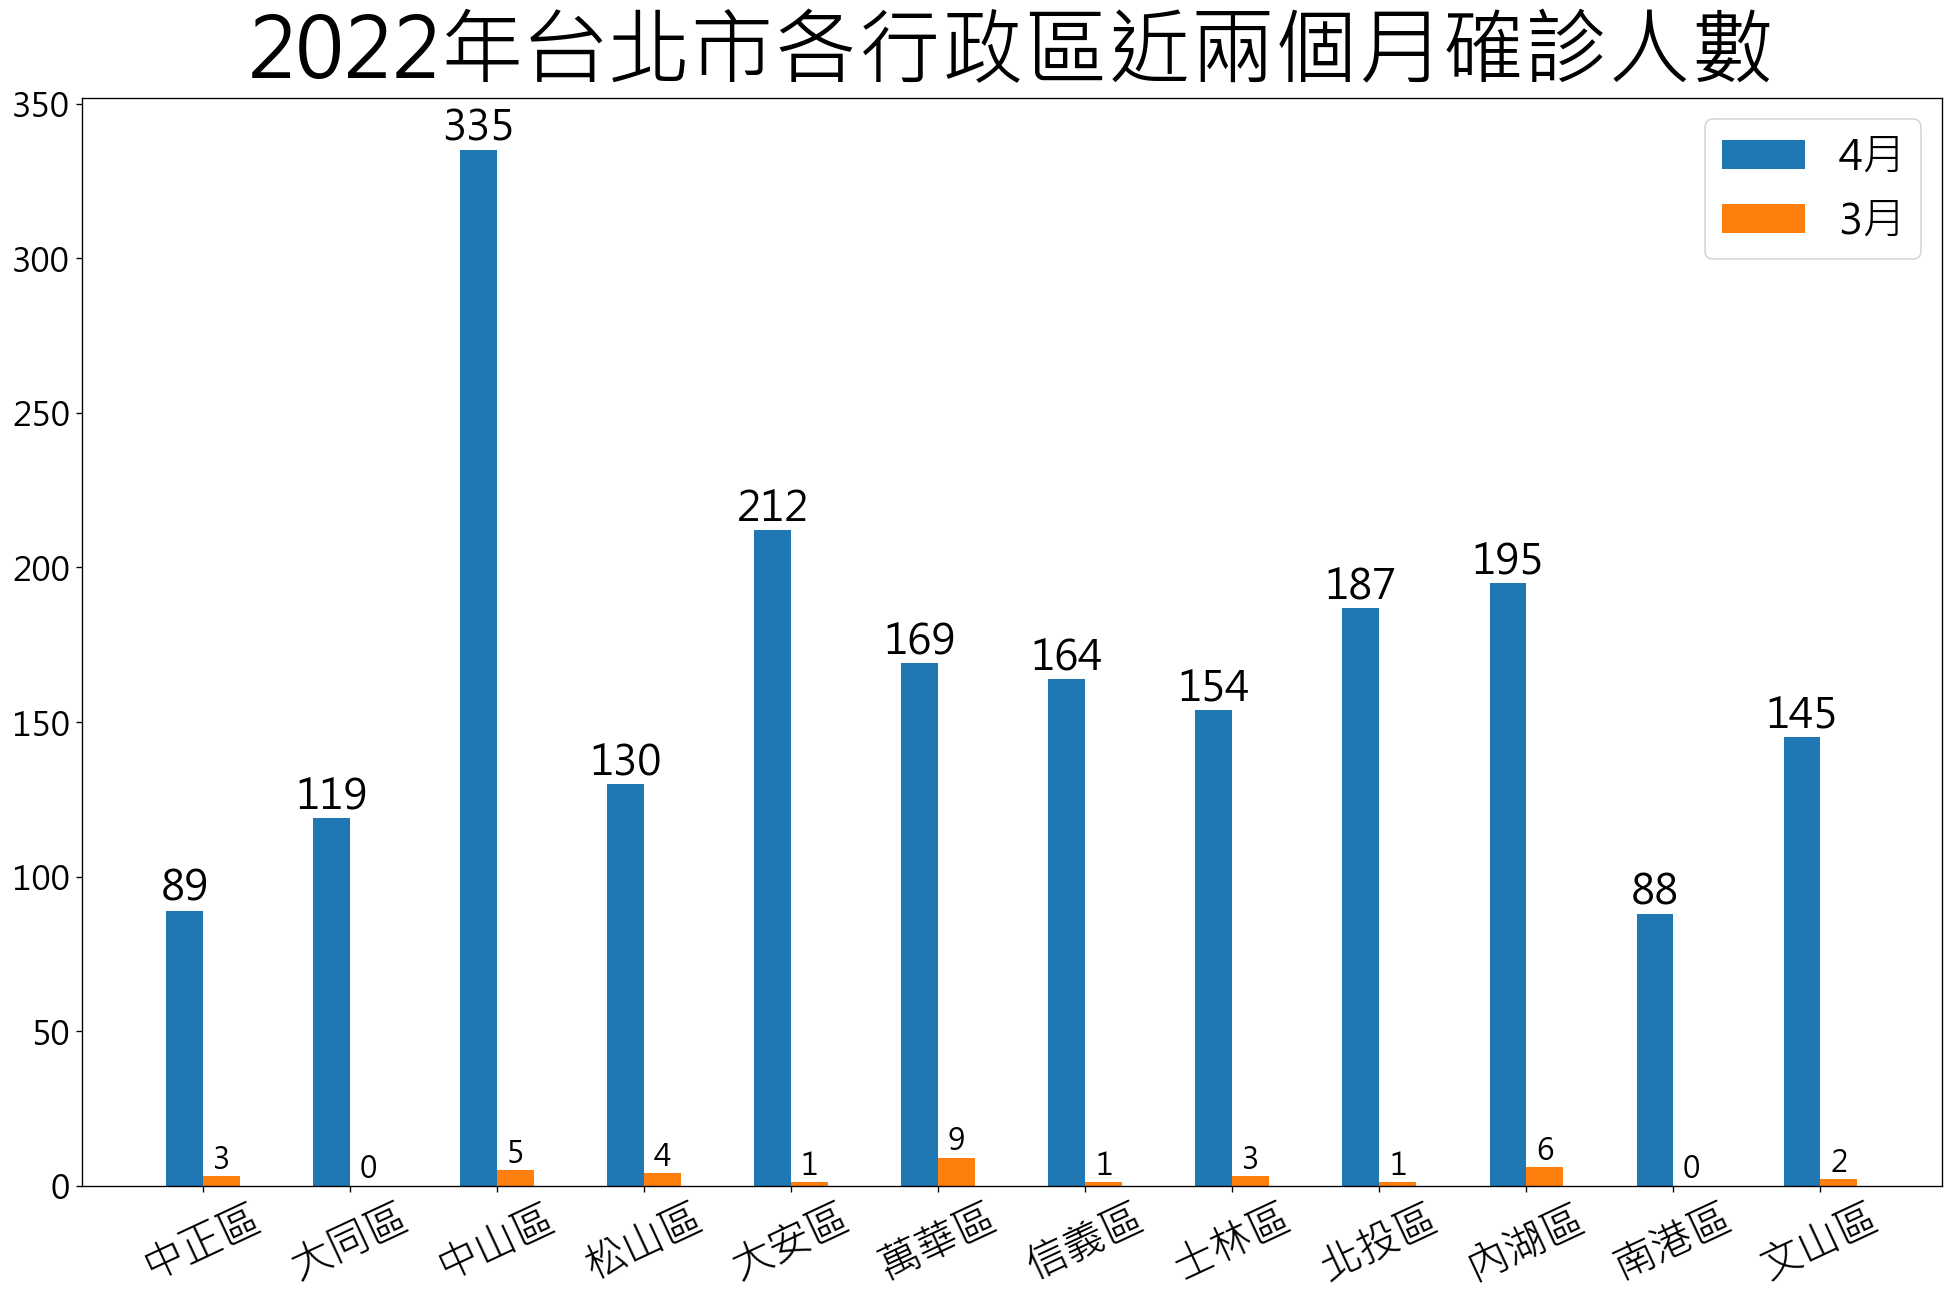

南海島
釣魚台
基隆市
新北市
新北市 : ['萬里區', '金山區', '板橋區', '汐止區', '深坑區', '石碇區', '瑞芳區', '平溪區', '雙溪區', '貢寮區', '新店區', '坪林區', '烏來區', '永和區', '三峽區', '樹林區', '鶯歌區', '三重區', '新莊區', '泰山區', '林口區', '蘆洲區', '五股區', '八里區', '淡水區', '三芝區', '石門區', '中和區', '土城區']
1
4
598
194
19
1
65
1
1
1
274
1
3
136
346
131
68
474
509
57
68
166
85
39
146
10
1
442
237
--------------------------------------------------
    行政區   4月  3月
0   萬里區    1   1
1   金山區    4   0
2   板橋區  598   5
3   汐止區  194   4
4   深坑區   19   1
5   石碇區    1   0
6   瑞芳區   65   1
7   平溪區    1   0
8   雙溪區    1   0
9   貢寮區    1   0
10  新店區  274  10
11  坪林區    1   0
12  烏來區    3   0
13  永和區  136   3
14  三峽區  346   6
15  樹林區  131  27
16  鶯歌區   68   0
17  三重區  474   7
18  新莊區  509   4
19  泰山區   57   2
20  林口區   68   3
21  蘆洲區  166   0
22  五股區   85   0
23  八里區   39   0
24  淡水區  146   2
25  三芝區   10   0
26  石門區    1   0
27  中和區  442  29
28  土城區  237   9


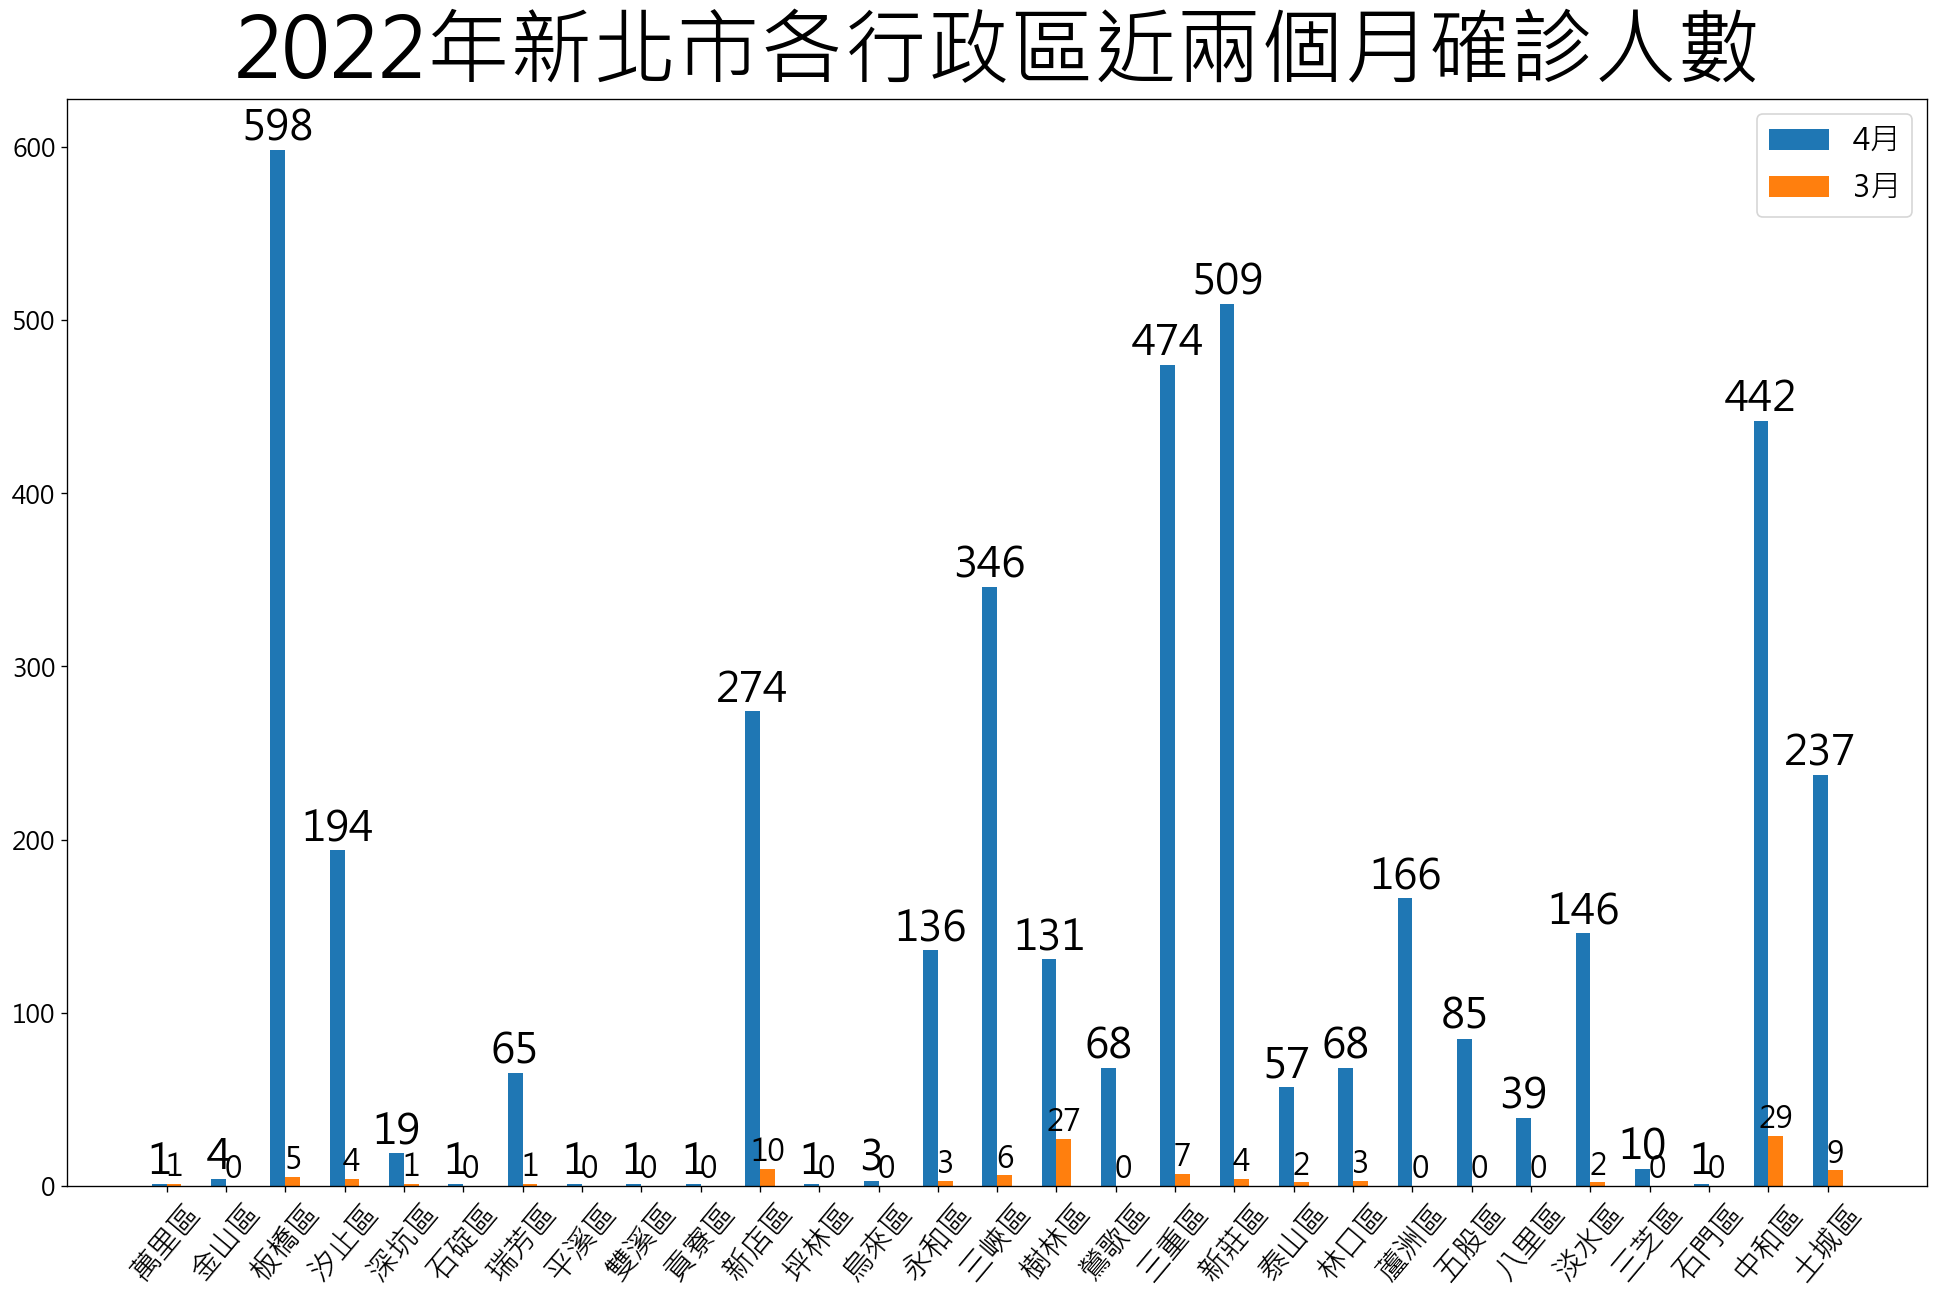

宜蘭縣
連江縣
新竹市
新竹縣
桃園市
苗栗縣
台中市
彰化縣
南投縣
嘉義市
嘉義縣
雲林縣
台南市
高雄市
屏東縣
澎湖縣
金門縣
台東縣
花蓮縣


In [16]:
# 縣市各行政區確診 柱狀圖
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

north=['台北市','新北市']
counts=0

# 不簡便寫法
# list1,list2,list3,list4,list5=[],[],[],[],[]
# nums_area_list=[list1,list2,list3,list4,list5]

# 比上面方面很多 依照數量一次創建多個list放入一個大list
nums_area_list=[list() for n in range(len(north))]
print(nums_area_list)

# 慢慢縮小尋找的值 .str.contains()包含哪些字串
df_2204=df.loc[df['個案公佈日'].str.contains("2022-04")]  # 2022年4月
df_2203=df.loc[df['個案公佈日'].str.contains("2022-03")]  # 2022年3月

#     df_north=df.loc[df['縣市']==obj]
    
# 先有各區人數表格 才能畫圖
def County_Area_Fn(df_):
    df_new=df_.loc[df_['鄉鎮']==a_obj]
    len_=len(df_new)
    return len_   

# 畫圖 n_obj給圖的標題 
def plot_pic(n_obj,value):
    # 顯示中文
    plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
    plt.rcParams['axes.unicode_minus'] = False

    plt.figure(dpi=120,figsize=(20,12))

    # 設定x軸柱狀位置
    x_position=np.arange(len(value))
    x_width=0.25  # 柱狀寬度

    plt.bar(x_position-(x_width/2),df_nums_area['4月'],label='4月', width=0.25)
    plt.bar(x_position+(x_width/2),df_nums_area['3月'],label='3月', width=0.25)

    # 柱狀圖頂端顯示數值
    for a,b in zip(x_position-(x_width/2),df_nums_area['4月']):
        plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=25)
    for a,b in zip(x_position+(x_width/2),df_nums_area['3月']):
        plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=18)

    plt.title('2022年'+n_obj+'各行政區近兩個月確診人數',fontsize=50)
    if len(value)>20:
        plt.xticks(x_position,value,fontsize=18,rotation=50)
        plt.yticks(fontsize=15)
        plt.legend(loc='best',fontsize=18)
    else:
        plt.xticks(x_position,value,fontsize=25,rotation=25)
        plt.yticks(fontsize=20)
        plt.legend(loc='best',fontsize=25)  
    plt.show()
    
for key,value in area_dict.items(): 
    print(key)
    for n_index,n_obj in enumerate(north):   
        # 如果字典中有符合north的縣市 就取出2022年4月的df裡所有符合north縣市的欄位
        if key==north[n_index]:
            df_area_2204=df_2204.loc[df['縣市']==north[n_index]]
            df_area_2203=df_2203.loc[df['縣市']==north[n_index]]
            print(north[n_index],':',value)

            for a_i,a_obj in enumerate(value):
                nums_area_2204=County_Area_Fn(df_area_2204)  # 透過County_Area_Fn函數取出north縣市的各行政區域確診人數
                nums_area_2203=County_Area_Fn(df_area_2203)
                print(nums_area_2204)
                nums_area_list[n_index].append([a_obj,nums_area_2204,nums_area_2203])  # 列出north的縣市 一次一縣市
        #print(nums_area_list)
            df_nums_area=pd.DataFrame(nums_area_list[n_index],columns=['行政區','4月','3月'])  # 將上面一次一縣市的list轉df
            print('-'*50)
            print(df_nums_area)           
            plot_pic(n_obj,value)            
        else:  
            pass 
   

In [1]:
# 製作近30天的日期
from datetime import date 
from datetime import timedelta
from datetime import datetime

ago_list=[]

today=datetime.now()
print('今天-1日期:',today)
ago_30=today-timedelta(days=30)
print('30天前日期:',ago_30)

# 印出時間字串 range可以控制日期範圍
for t in range(0,29):    
    ago_days=ago_30+timedelta(t)  # 從30天前一天一天累加至今天
    ago_days=datetime.strftime(ago_days,'%Y-%m-%d')   # 將時間格式轉成字串
    ago_list.append(ago_days)
print(ago_list)

今天-1日期: 2022-04-20 01:51:21.443770
30天前日期: 2022-03-21 01:51:21.443770
['2022-03-21', '2022-03-22', '2022-03-23', '2022-03-24', '2022-03-25', '2022-03-26', '2022-03-27', '2022-03-28', '2022-03-29', '2022-03-30', '2022-03-31', '2022-04-01', '2022-04-02', '2022-04-03', '2022-04-04', '2022-04-05', '2022-04-06', '2022-04-07', '2022-04-08', '2022-04-09', '2022-04-10', '2022-04-11', '2022-04-12', '2022-04-13', '2022-04-14', '2022-04-15', '2022-04-16', '2022-04-17', '2022-04-18']


[[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 1, 2, 0, 1, 0, 1, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 2, 1, 1, 1, 0, 1, 0, 0, 0], [2, 0, 1, 0, 0, 1, 0, 2, 0, 3, 0, 1], [0, 1, 0, 2, 2, 3, 0, 2, 3, 3, 2, 1], [0, 1, 1, 1, 1, 1, 0, 3, 2, 2, 0, 1], [3, 0, 1, 1, 6, 2, 3, 2, 2, 2, 0, 0], [2, 3, 7, 3, 1, 0, 3, 4, 1, 3, 2, 0], [1, 1, 7, 2, 6, 4, 2, 3, 4, 7, 2, 2], [3, 5, 12, 5, 6, 4, 4, 10, 11, 14, 3, 7], [3, 2, 18, 2, 5, 4, 3, 2, 11, 4, 2, 5], [3, 2, 23, 5, 7, 5, 4, 5, 10, 4, 3, 3], [4, 3, 8, 3, 7, 11, 6, 6, 10, 4, 3, 2], [1, 10, 23, 6, 9, 12, 4, 7, 12, 4, 4, 4], [5, 7, 29, 5, 9, 6, 10, 4, 6, 7, 6, 7], [4, 7, 26, 12, 18, 18, 15, 8, 20, 8, 6, 0], [6, 12, 24, 11, 19, 13, 13, 10, 15, 12, 3, 9], [8, 4, 23, 14, 15, 11, 10, 15, 10, 17, 3, 15], [10, 19, 

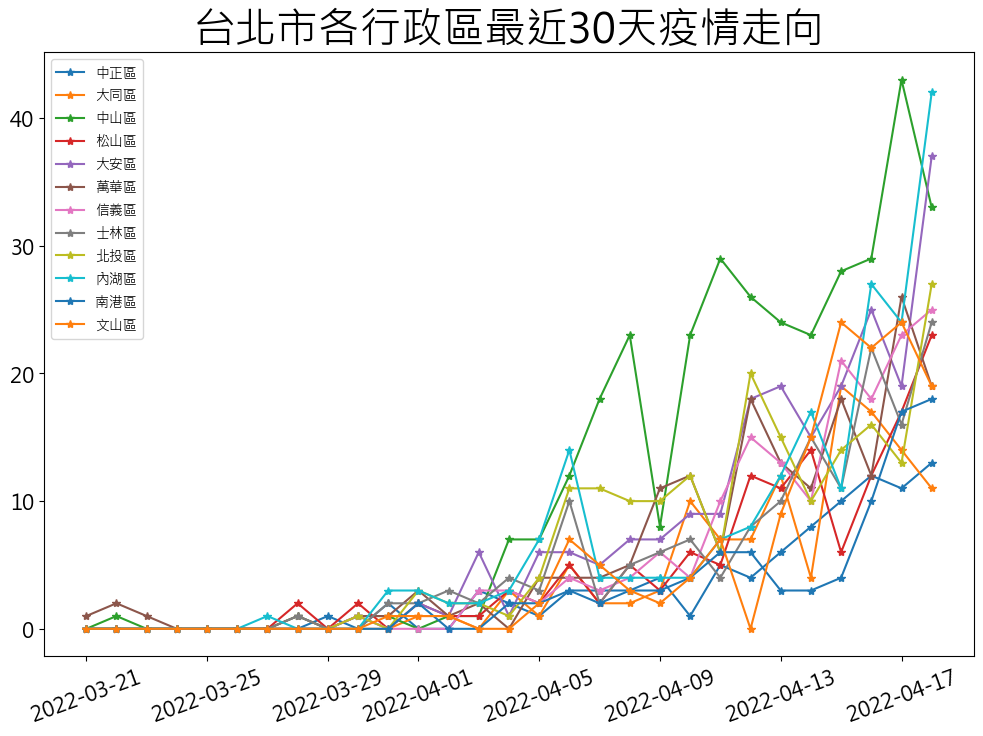

In [10]:
# 近30天縣市各行政區確診 線性圖
# 若不知在寫啥就把註解打開
import pandas as pd
import matplotlib.pyplot as plt

which_='台北市'
num_list=[list() for n in range(len(ago_list))]  # 按照日期數量建立的list

# 要由哪個分隔 i就要在哪
for i,ago in enumerate(ago_list):
    #print('-'*10,ago,'-'*10)    
    for area in area_dict[which_]:
        #print('*'*10,area,'*'*10)
        # 直接找出各鄉鎮的確診人數 依照縣市.日期.鄉鎮依序縮小df範圍
        nums=df.loc[df['縣市']==which_].loc[df['個案公佈日']==ago].loc[df['鄉鎮']==area]
        #print(ago,':',len(nums))
        num_list[i].append(len(nums))  # 每個日期的各鄉鎮確診數為一個list 
print(num_list)  # 二維list     
print()
# 建立成畫圖用的df
trend_nums_df=pd.DataFrame(num_list,columns=area_dict[which_],index=ago_list)
print(trend_nums_df)

# # 從字串轉成日期格式 以免太多擠在一起
tt=trend_nums_df.index
tt=pd.to_datetime(tt)

# 顯示中文
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

fig=plt.figure(dpi=100,figsize=(12,8))
for oo in area_dict[which_]:
    plt.plot(tt,trend_nums_df[oo],'-*',label=oo)
plt.title(which_+'各行政區最近30天疫情走向',fontsize=30)
plt.xticks(fontsize=15,rotation=20)
plt.yticks(fontsize=15)
plt.legend(loc='best')
plt.show()

In [ ]:
# 柱狀圖網路範例

import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

students = ['Jack', 'Mary', 'Mike', 'David']
math_scores = [78, 67, 90, 81]
x = np.arange(len(students))
plt.bar(x, math_scores, color=['red', 'green', 'blue', 'yellow'])
plt.xticks(x, students)
plt.xlabel('Students')
plt.ylabel('Math')
plt.title('Final Term')
plt.show()

X = [0.5]
XX=[1.5]
Y = [20]
YY=[23]
#fig = plt.figure()
plt.bar(X, Y, 1, color="blue")
plt.bar(XX,YY,1,color="yellow")  # 使用不同顏色
plt.xlabel("X-axis")  # 設定X軸Y軸名稱
plt.ylabel("Y-axis")
plt.title("bar chart")#使用text顯示數值
for a,b in zip(X,Y):
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=11)
for a,b in zip(XX,YY):
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=11)
plt.ylim(0,37) # 設定Y軸上下限
plt.show() # 得到的圖形如下: